## Variation in per epitope relevancy and interaction information 

In [1]:
import pandas as pd
import numpy as np
import pyrepseq as prs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.odr import *

sns.set_theme()
sns.set_style("ticks")

from src import *

import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
mpl.rcParams['font.family'] = 'serif'

Matplotlib is building the font cache; this may take a moment.
/Users/james/Documents/Projects/TCR-info 2022/paper_tcrinfo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
olga = pd.read_csv('data/olga.csv.gz',sep=',').astype(str)
spc = pd.read_csv('data/spc.csv.gz',sep=',').astype(str)
epitope_meta = pd.read_csv('data/epitope_meta.csv.gz',sep=',')

## Compute interaction information for each epitope

In [3]:
def feature_info(background_df, spc_df, feature_1, feature_2 = None):
    
    if feature_2 is None:
        background = prs.renyi2_entropy(background_df, feature_1)
        error_background = prs.stdrenyi2_entropy(background_df, feature_1)
        specific = spc_df.groupby('Epitope').apply(lambda x: prs.renyi2_entropy(x, feature_1))
        error_specific = spc_df.groupby('Epitope').apply(lambda x: prs.stdrenyi2_entropy(x, feature_1))
    
    else:
        background = prs.renyi2_entropy(background_df, feature_1) + prs.renyi2_entropy(background_df, feature_2)
        error_background = np.sqrt(prs.stdrenyi2_entropy(background_df, feature_1)**2 +  prs.stdrenyi2_entropy(background_df, feature_2)**2)
        specific = spc_df.groupby('Epitope').apply(lambda x: prs.renyi2_entropy(x, [feature_1, feature_2]))
        error_specific = spc_df.groupby('Epitope').apply(lambda x: prs.stdrenyi2_entropy(x, [feature_1, feature_2]))
    
    return background-specific, np.sqrt(error_background**2 + error_specific**2)

In [4]:
markers = {"minervina":'o', "dash":'^'}
epitope_data = epitope_meta.copy().set_index("Epitope")

epitope_data["alpha_info"], epitope_data["std_alpha_info"] = feature_info(olga, spc, 'Alpha')
epitope_data["beta_info"], epitope_data["std_beta_info"] = feature_info(olga, spc, 'Beta')
epitope_data["full_sequence_info"], epitope_data["std_full_sequence_info"] = feature_info(olga, spc, 'Alpha', 'Beta')

epitope_data['syn'] = epitope_data["full_sequence_info"] - epitope_data["alpha_info"] - epitope_data["beta_info"]
epitope_data['std_syn'] = np.sqrt(epitope_data["std_full_sequence_info"]**2 + epitope_data["std_alpha_info"]**2 + epitope_data["std_beta_info"]**2)

/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25193/849728923.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  specific = spc_df.groupby('Epitope').apply(lambda x: prs.renyi2_entropy(x, feature_1))
/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25193/849728923.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_specific = spc_df.groupby('Epitope').apply(lambda x: prs.stdren

In [5]:
epitope_data

,id_code,set,alpha_info,std_alpha_info,beta_info,std_beta_info,full_sequence_info,std_full_sequence_info,syn,std_syn
Epitope,,,,,,,,,,
NQK,1,minervina,11.536989,0.556614,19.683288,0.666329,36.337081,1.006327,5.116804,1.329100
DTD,2,minervina,11.255244,0.562063,19.808609,0.848787,36.258869,1.124602,5.195016,1.516932
LLY,3,minervina,10.269827,0.978103,18.842052,1.120608,35.732884,1.442978,6.621005,2.072350
PTD,4,minervina,12.440678,0.458891,15.727501,0.500980,33.618333,1.006988,5.450154,1.214738
YLQ,5,minervina,11.396778,0.380579,18.347393,0.567619,32.826412,1.136089,3.082240,1.325794
FTS,6,minervina,7.597396,0.578565,14.539144,0.395050,32.121854,0.825939,9.985314,1.083041
ALS,7,minervina,9.046388,1.009576,12.226295,1.442953,31.924482,1.442978,10.651799,2.276740
LTD,8,minervina,9.871511,0.454385,15.441364,0.418026,31.891624,0.710867,6.578749,0.941564
TTD,9,minervina,9.401586,0.183970,13.831517,0.178611,30.318993,0.496026,7.085890,0.558380


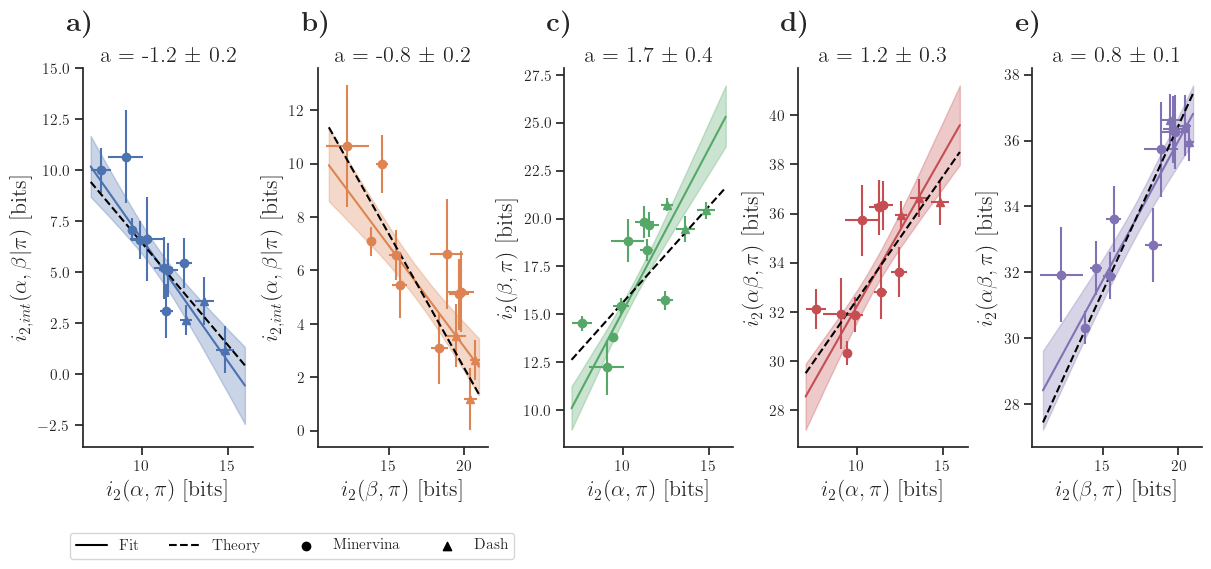

In [6]:
fig, ax = plt.subplots(1,5, figsize = (12,5), dpi=100, layout='constrained')

for dataset, dfg in epitope_data.groupby('set'):
    
    ax[0].errorbar(x=dfg["alpha_info"], y=dfg["syn"], xerr=dfg["std_alpha_info"], yerr=dfg["std_syn"], linestyle=None, c= 'C0', fmt=markers[dataset])
    ax[1].errorbar(x=dfg["beta_info"], y=dfg["syn"], xerr=dfg["std_beta_info"], yerr=dfg["std_syn"], linestyle=None, c= 'C1', fmt=markers[dataset])
    ax[2].errorbar(x=dfg["alpha_info"], y=dfg["beta_info"], xerr=dfg["std_alpha_info"], yerr=dfg["std_beta_info"], linestyle=None, c= 'C2', fmt=markers[dataset])
    ax[3].errorbar(x=dfg["alpha_info"], y=dfg["full_sequence_info"], xerr=dfg["std_alpha_info"], yerr=dfg["std_full_sequence_info"], linestyle=None, c= 'C3', fmt=markers[dataset])
    ax[4].errorbar(x=dfg["beta_info"], y=dfg["full_sequence_info"], xerr=dfg["std_beta_info"], yerr=dfg["std_full_sequence_info"], linestyle=None, c= 'C4', fmt=markers[dataset])
 
 
# #fitting
plot_fit(x=epitope_data["alpha_info"], y=epitope_data['syn'], func=linear_func, beta0=[-1, 1.], x_to_plot=np.linspace(7,16,1000), ax=ax[0], color='C0', sx=epitope_data["std_alpha_info"], sy=epitope_data["std_syn"])   
plot_fit(x=epitope_data["beta_info"], y=epitope_data['syn'], func=linear_func, beta0=[-1, 1.], x_to_plot=np.linspace(11,21,1000), ax=ax[1], color='C1', sx=epitope_data["std_beta_info"], sy=epitope_data["std_syn"])   
plot_fit(x=epitope_data["alpha_info"], y=epitope_data['beta_info'], func=linear_func, beta0=[1, 1.], x_to_plot=np.linspace(7,16,1000), ax=ax[2], color='C2', sx=epitope_data["std_alpha_info"], sy=epitope_data["std_beta_info"])   
plot_fit(x=epitope_data["alpha_info"], y=epitope_data['full_sequence_info'], func=linear_func, beta0=[1, 1.], x_to_plot=np.linspace(7,16,1000), ax=ax[3],color='C3', sx=epitope_data["std_alpha_info"], sy=epitope_data["std_full_sequence_info"])   
plot_fit(x=epitope_data["beta_info"], y=epitope_data['full_sequence_info'], func=linear_func, beta0=[1, 1.], x_to_plot=np.linspace(11,21,1000), ax=ax[4], color='C4', sx=epitope_data["std_beta_info"], sy=epitope_data["std_full_sequence_info"])  


theory_fits = []
#fitting-theory
theory_fits.append(plot_fit(x=epitope_data["alpha_info"], y=epitope_data['syn'], func=fixed_negative_gradient_func, beta0=[1.], x_to_plot=np.linspace(7,16,1000), ax=ax[0], color='black', linestyle='--', intervals=False, title=False, sx=epitope_data["std_alpha_info"], sy=epitope_data["std_syn"]))
theory_fits.append(plot_fit(x=epitope_data["beta_info"], y=epitope_data['syn'], func=fixed_negative_gradient_func, beta0=[1.], x_to_plot=np.linspace(11,21,1000), ax=ax[1], color='black', linestyle='--', intervals=False, title=False, sx=epitope_data["std_beta_info"], sy=epitope_data["std_syn"]))
theory_fits.append(plot_fit(x=epitope_data["alpha_info"], y=epitope_data['beta_info'], func=fixed_positive_gradient_func, beta0=[1.], x_to_plot=np.linspace(7,16,1000), ax=ax[2], color='black', linestyle='--', intervals=False, title=False, sx=epitope_data["std_alpha_info"], sy=epitope_data["std_beta_info"])) 
theory_fits.append(plot_fit(x=epitope_data["alpha_info"], y=epitope_data['full_sequence_info'], func=fixed_positive_gradient_func, beta0=[1.], x_to_plot=np.linspace(7,16,1000), ax=ax[3], color='black', linestyle='--', intervals=False, title=False, sx=epitope_data["std_alpha_info"], sy=epitope_data["std_full_sequence_info"])) 
theory_fits.append(plot_fit(x=epitope_data["beta_info"], y=epitope_data['full_sequence_info'], func=fixed_positive_gradient_func, beta0=[1.], x_to_plot=np.linspace(11,21,1000), ax=ax[4], color='black', linestyle='--', intervals=False, title=False, sx=epitope_data["std_beta_info"], sy=epitope_data["std_full_sequence_info"]))

ax[0].set_ylabel(r"$i_{2, int}(\alpha, \beta | \pi)$ [bits]")
ax[0].set_xlabel(r"$i_2(\alpha, \pi)$ [bits]")
ax[1].set_ylabel(r"$i_{2, int}(\alpha, \beta | \pi)$ [bits]")
ax[1].set_xlabel(r"$i_2(\beta, \pi)$ [bits]")
ax[2].set_xlabel(r"$i_2(\alpha, \pi)$ [bits]")
ax[2].set_ylabel(r"$i_2(\beta, \pi)$ [bits]")
ax[3].set_ylabel(r"$i_2(\alpha \beta , \pi)$ [bits]")
ax[3].set_xlabel(r"$i_2(\alpha, \pi)$ [bits]")
ax[4].set_ylabel(r"$i_2(\alpha \beta , \pi)$ [bits]")
ax[4].set_xlabel(r"$i_2(\beta, \pi)$ [bits]")

ax[0].plot(10, 5, linestyle = "-", c='black', label="Fit")
ax[0].plot(10, 5, linestyle = "--", c='black', label="Theory")
ax[0].scatter(10, 20, marker='o', c='black', label="Minervina")
ax[0].scatter(10, 20,  marker='^', c='black', label="Dash")

ax[0].set_ylim([None, 15])

fig.legend(bbox_to_anchor=(0.43, -0.04), ncols=4)

for n, a in enumerate(ax):  
    a.text(-0.1, 1.1, f"\\bf {string.ascii_lowercase[n]})", transform=a.transAxes,
            size=20)

plt.savefig(f'figures/figure5.svg',bbox_inches='tight', dpi=500);

### Fitting parameters

In [7]:
for fit in theory_fits:
    print(f"{fit.beta[0]:.1f} +/- {round_up(fit.sd_beta[0], 1)}")

16.4 +/- 0.3
22.4 +/- 0.5
5.6 +/- 0.5
22.5 +/- 0.5
16.4 +/- 0.3
